<a href="https://colab.research.google.com/github/tarekhosen1111/Environmental-Sound-Classification/blob/main/Environmental_Sound_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tarekhosen","key":"cfec7cf90c944be965b3950dbe3c0fbc"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d chrisfilo/urbansound8k

100% 5.60G/5.61G [00:56<00:00, 135MB/s]
100% 5.61G/5.61G [00:57<00:00, 106MB/s]


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
filename='/content/sample_data/children_playing.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

fold1	fold2  fold4  fold6  fold8  kaggle.json  UrbanSound8K.csv
fold10	fold3  fold5  fold7  fold9  sample_data  urbansound8k.zip


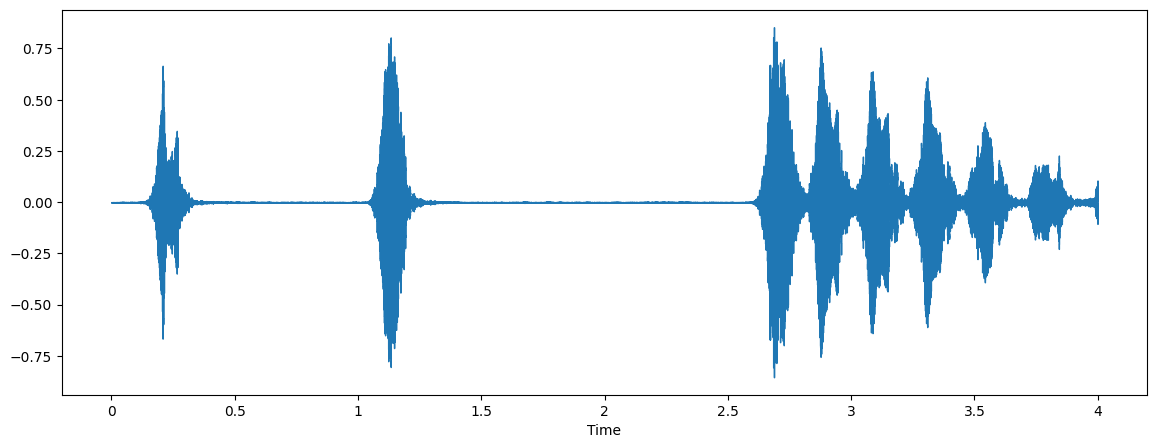

In [ ]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
filename='/content/sample_data/dog_bark.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

48000

In [ ]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

In [ ]:
data

array([-0.00011485, -0.00017083, -0.00017736, ..., -0.04609928,
       -0.04609471, -0.05099387], dtype=float32)

In [ ]:
import pandas as pd
metadata=pd.read_csv('/content/UrbanSound8K.csv')
metadata.head(10)

In [ ]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

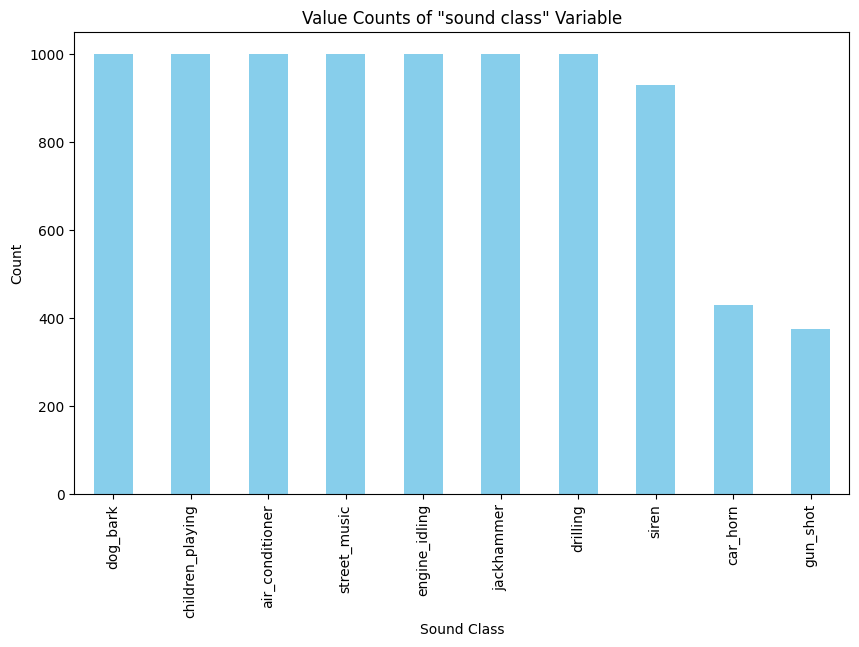

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'metadata' is a Pandas DataFrame
# Replace 'class' with the actual column name in your DataFrame
value_counts = metadata['class'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts of "sound class" Variable')
plt.xlabel('Sound Class')
plt.ylabel('Count')
plt.show()


In [ ]:
audio_file_path='/content/sample_data/dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

In [ ]:
librosa_audio_data.dtype

dtype('float32')

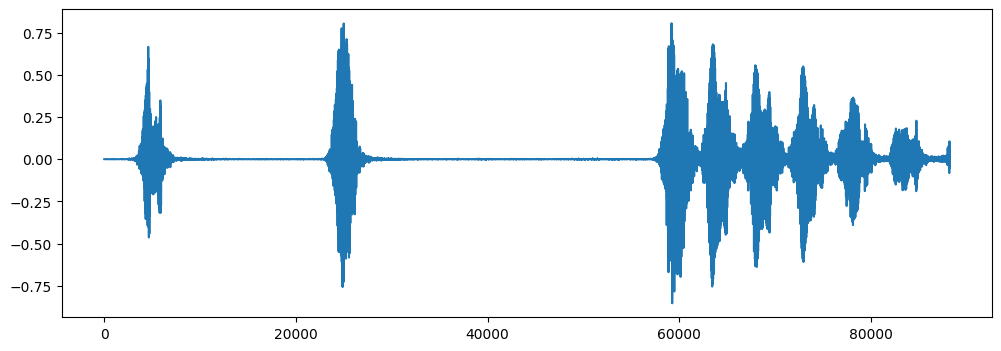

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

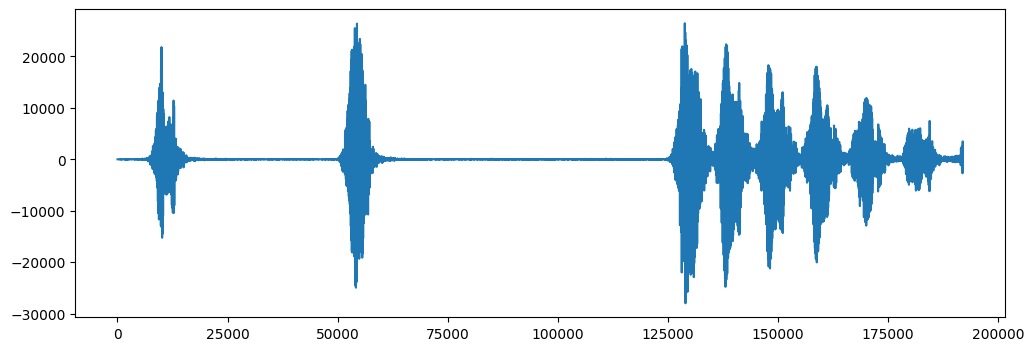

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-5.2506586e+02, -5.1955695e+02, -5.1864276e+02, ...,
        -4.3568549e+02, -3.8558670e+02, -3.0779324e+02],
       [ 9.1999207e+00,  1.6759439e+01,  1.8103909e+01, ...,
         1.1375923e+02,  1.4776443e+02,  1.3558249e+02],
       [ 8.8355551e+00,  1.5750109e+01,  1.7259296e+01, ...,
         6.4274643e+01,  4.9179779e+01,  3.2849552e+01],
       ...,
       [ 4.3309429e-01, -3.5408905e+00, -4.8356504e+00, ...,
        -5.2699099e+00, -1.2849571e-01,  7.5349283e-01],
       [ 4.4520628e-01, -3.2774835e+00, -4.6472917e+00, ...,
        -3.4224064e+00,  3.9007013e+00,  5.5314279e-01],
       [ 3.5697088e-01, -2.9899063e+00, -4.4125957e+00, ...,
        -2.6713343e+00,  2.7894566e+00,  1.4206086e-01]], dtype=float32)

In [ ]:
import numpy as np
wave_audio_float = wave_audio.astype(np.float32) / np.iinfo(np.int16).max
mfccs = librosa.feature.mfcc(y=wave_audio_float, sr=wave_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 376)


In [ ]:
np.mean(mfccs, axis=1)


array([-4.2297131e+02,  8.4817619e+01,  2.8964190e+01,  4.2909012e+00,
       -1.2734877e+01, -6.3045681e-01,  2.1967719e+00, -6.9778371e+00,
       -9.4767809e+00, -5.1173520e+00, -6.2132034e+00, -5.6209631e+00,
        1.9223211e+00, -2.4933357e+00, -1.8681366e+00,  3.8868544e+00,
        1.2106044e+00,  1.8324705e+00,  4.4661717e+00,  4.1889186e+00,
        3.5470605e+00,  2.3217192e+00, -1.7050304e+00, -3.3529079e+00,
       -7.7712893e-01, -1.2799754e+00, -1.9638327e+00, -2.2452905e+00,
       -3.6465447e+00, -2.1934879e+00, -2.2655186e-01, -1.7850664e+00,
       -1.8760924e+00,  4.4535568e-01, -2.7724525e-01,  2.4466279e-01,
        1.5187033e-01, -7.3558193e-01, -2.4189585e-01, -1.8661307e+00],
      dtype=float32)

In [ ]:
import os
import librosa
import numpy as np
from tqdm import tqdm
audio_dataset_path = '/content/'
metadata = pd.read_csv('/content/UrbanSound8K.csv')

def features_extractor(file):
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40,n_fft=1024)
    mfccs_scaled_features = np.mean(mfccs_features, axis=1)

    return mfccs_scaled_features

extracted_features = []
for index_num, row in tqdm(metadata.iterrows(), desc="Processing Rows"):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

Processing Rows: 8732it [03:39, 39.81it/s]


In [ ]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head(10)

,feature,class
0,"[-297.3973, 62.766865, -117.660324, -57.29616,...",dog_bark
1,"[-490.71515, 98.96974, -42.70029, 51.263252, 9...",children_playing
2,"[-525.64197, 111.47852, -37.607727, 43.46369, ...",children_playing
3,"[-480.8334, 91.745125, -24.20152, 42.913536, 1...",children_playing
4,"[-512.5282, 103.20618, -42.739483, 50.84463, 1...",children_playing
5,"[-513.97296, 108.21414, -25.133505, 48.250637,...",children_playing
6,"[-542.4173, 108.498665, -18.48397, 46.492886, ...",children_playing
7,"[-530.0026, 105.4136, -18.499365, 40.145546, 5...",children_playing
8,"[-539.5416, 118.26583, -30.122929, 51.772766, ...",children_playing
9,"[-268.58582, 102.581345, -0.6573407, -10.04810...",car_horn


In [ ]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X

array([[-2.97397308e+02,  6.27668648e+01, -1.17660324e+02, ...,
        -1.29151475e+00, -1.14695275e+00,  2.46434665e+00],
       [-4.90715149e+02,  9.89697418e+01, -4.27002907e+01, ...,
         1.65764892e+00, -1.95411360e+00,  1.71552324e+00],
       [-5.25641968e+02,  1.11478523e+02, -3.76077271e+01, ...,
         3.78868508e+00, -3.17210346e-01,  7.43579149e-01],
       ...,
       [-3.69238556e+02,  1.02850876e+02, -3.69296227e+01, ...,
        -1.39325964e+00,  1.63594902e+00,  9.14042282e+00],
       [-4.08523254e+02,  1.15463043e+02, -4.49407425e+01, ...,
        -6.62783527e+00, -2.71802378e+00,  6.27351475e+00],
       [-3.79519379e+02,  8.29149551e+01, -2.64749317e+01, ...,
         1.12218714e+00, -1.13648119e+01, -5.42373180e+00]], dtype=float32)

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [ ]:
X_train

array([[-1.96456482e+02,  1.02344086e+02, -1.26829681e+01, ...,
         4.62724018e+00, -3.01694775e+00,  4.39803791e+00],
       [-7.58954468e+01,  8.01267929e+01,  6.97066832e+00, ...,
        -3.27810693e+00, -4.99339294e+00, -1.41163182e+00],
       [-1.12947037e+02, -1.45150423e+01, -6.75028849e+00, ...,
         1.94652224e+00, -1.01998997e+00,  2.69367313e+00],
       ...,
       [-4.95266876e+02,  8.56042480e+01,  5.77524042e+00, ...,
         8.73308122e-01,  3.52582723e-01,  7.04829633e-01],
       [-2.09732864e+02,  1.22762596e+02, -2.13189678e+01, ...,
         1.34020734e+00, -1.86205840e+00, -8.58021975e-01],
       [-4.88472534e+02,  2.08013733e+02,  8.57720375e+00, ...,
        -3.06269050e+00, -3.56066036e+00,  3.94936919e-01]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

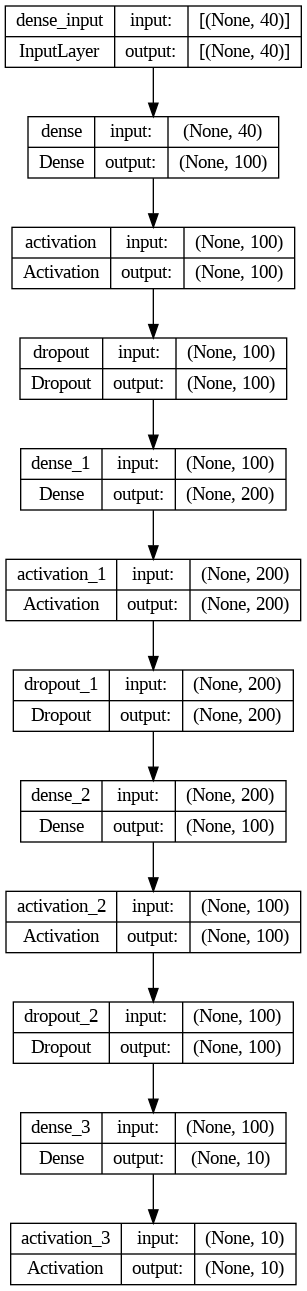

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
178/183 [============================>.] - ETA: 0s - loss: 1.0301 - accuracy: 0.6485
Epoch 1: val_loss improved from inf to 0.84166, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 1s 5ms/step - loss: 1.0295 - accuracy: 0.6484 - val_loss: 0.8417 - val_accuracy: 0.7384
Epoch 2/100
 41/183 [=====>........................] - ETA: 0s - loss: 1.0231 - accuracy: 0.6524

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


171/183 [===========================>..] - ETA: 0s - loss: 1.0429 - accuracy: 0.6493
Epoch 2: val_loss did not improve from 0.84166
183/183 [==============================] - 1s 5ms/step - loss: 1.0407 - accuracy: 0.6504 - val_loss: 0.8493 - val_accuracy: 0.7387
Epoch 3/100
175/183 [===========================>..] - ETA: 0s - loss: 1.0332 - accuracy: 0.6479
Epoch 3: val_loss did not improve from 0.84166
183/183 [==============================] - 1s 5ms/step - loss: 1.0353 - accuracy: 0.6475 - val_loss: 0.8573 - val_accuracy: 0.7335
Epoch 4/100
175/183 [===========================>..] - ETA: 0s - loss: 1.0271 - accuracy: 0.6577
Epoch 4: val_loss did not improve from 0.84166
183/183 [==============================] - 1s 5ms/step - loss: 1.0264 - accuracy: 0.6569 - val_loss: 0.8596 - val_accuracy: 0.7391
Epoch 5/100
183/183 [==============================] - ETA: 0s - loss: 1.0100 - accuracy: 0.6511
Epoch 5: val_loss did not improve from 0.84166
183/183 [==============================] - 

91/91 [==============================] - 0s 2ms/step
Accuracy: 0.7713
Precision: 0.7858
Recall: 0.7713
F1-score: 0.7697


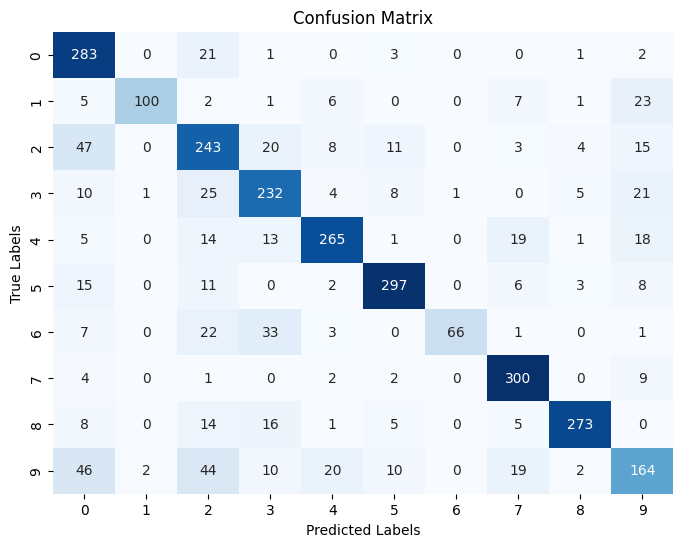

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
# Load the best model saved during training
best_model = load_model('saved_models/audio_classification.hdf5')

# Predict on the test set
y_pred = best_model.predict(X_test)

# Convert predictions to one-hot encoded format
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Epoch 1/100
176/183 [===========================>..] - ETA: 0s - loss: 0.9173 - accuracy: 0.6889
Epoch 1: val_loss improved from inf to 0.73424, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 1s 4ms/step - loss: 0.9117 - accuracy: 0.6918 - val_loss: 0.7342 - val_accuracy: 0.7800
Epoch 2/100
170/183 [==========================>...] - ETA: 0s - loss: 0.8641 - accuracy: 0.7086
Epoch 2: val_loss improved from 0.73424 to 0.72508, saving model to saved_models/audio_classification.hdf5
183/183 [==============================] - 1s 3ms/step - loss: 0.8626 - accuracy: 0.7091 - val_loss: 0.7251 - val_accuracy: 0.7828
Epoch 3/100
175/183 [===========================>..] - ETA: 0s - loss: 0.8683 - accuracy: 0.7093
Epoch 3: val_loss did not improve from 0.72508
183/183 [==============================] - 1s 3ms/step - loss: 0.8699 - accuracy: 0.7092 - val_loss: 0.7372 - val_accuracy: 0.7783
Epoch 4/100
176/183 [===========================>..] - ETA:

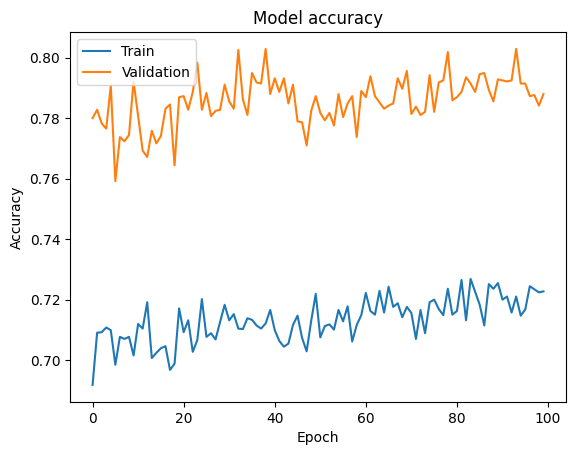

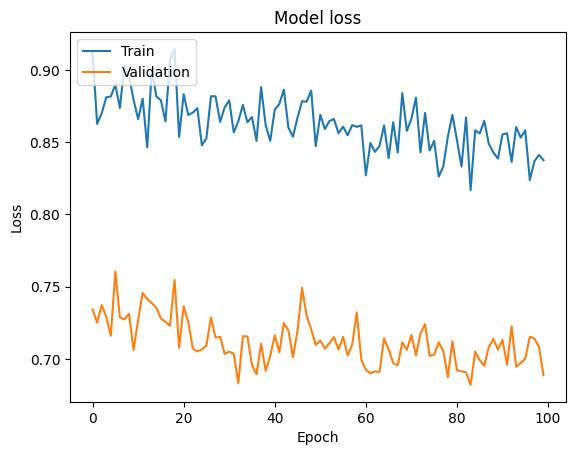

In [ ]:
import matplotlib.pyplot as plt
num_epochs = 100
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
# Assuming you have already trained your model and have the 'history' object
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
                    validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

# Define the number of classes (num_labels) and input shape (input_shape)

input_shape = (40,)  # Set the actual input shape based on your features

# Define the input layer
input_layer = Input(shape=input_shape)

# First layer
x = Dense(100)(input_layer)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Second layer
x = Dense(200)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Third layer
x = Dense(100)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

# Final layer
output_layer = Dense(num_labels, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model.summary()

# Compile the model (you need to specify the loss function, optimizer, and metrics)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs and batch size
num_epochs = 100
num_batch_size = 32

# Create a ModelCheckpoint callback to save the best model during training
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification1.hdf5',
                               verbose=1, save_best_only=True)

# Start the timer
start = datetime.now()

# Assuming you have X_train, y_train, X_test, y_test defined
# Replace 'categorical_crossentropy' with the appropriate loss for your problem
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,
          validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

# Calculate and print the training duration
duration = datetime.now() - start
print("Training completed in time: ", duration)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


178/183 [============================>.] - ETA: 0s - loss: 2.8553 - accuracy: 0.1131
Epoch 2: val_loss improved from 2.29533 to 2.28505, saving model to saved_models/audio_classification1.hdf5
183/183 [==============================] - 1s 3ms/step - loss: 2.8455 - accuracy: 0.1130 - val_loss: 2.2850 - val_accuracy: 0.1166
Epoch 3/100
177/183 [============================>.] - ETA: 0s - loss: 2.4153 - accuracy: 0.1176
Epoch 3: val_loss improved from 2.28505 to 2.27680, saving model to saved_models/audio_classification1.hdf5
183/183 [==============================] - 1s 3ms/step - loss: 2.4160 - accuracy: 0.1179 - val_loss: 2.2768 - val_accuracy: 0.1166
Epoch 4/100
179/183 [============================>.] - ETA: 0s - loss: 2.3184 - accuracy: 0.1114
Epoch 4: val_loss improved from 2.27680 to 2.27146, saving model to saved_models/audio_classification1.hdf5
183/183 [==============================] - 1s 3ms/step - loss: 2.3195 - accuracy: 0.1106 - val_loss: 2.2715 - val_accuracy: 0.1169
Epoc

91/91 [==============================] - 0s 2ms/step
Accuracy: 0.7363
Precision: 0.7683
Recall: 0.7363
F1-score: 0.7403


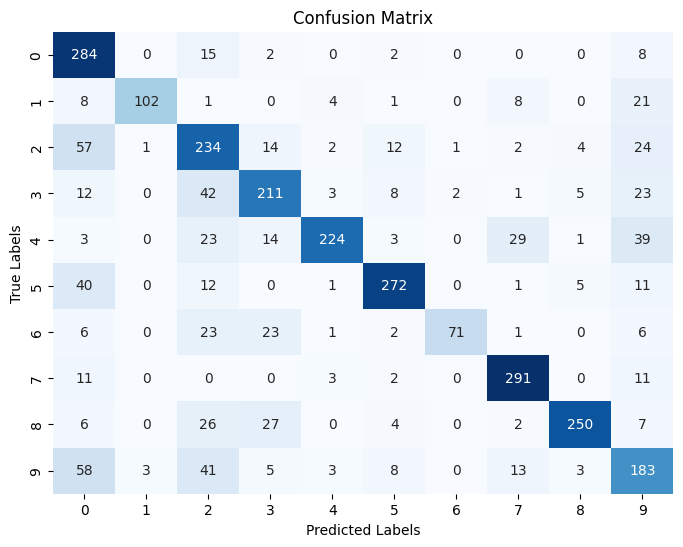

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
import seaborn as sns
# Load the best model saved during training
best_model = load_model('saved_models/audio_classification1.hdf5')

# Predict on the test set
y_pred = best_model.predict(X_test)

# Convert predictions to one-hot encoded format
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()